In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [19]:
ctrl1 = pd.read_csv('../code/LongReads/Exons/CTRL1_shRNA.SAMEA8691110.cassette_exons.tab.gz', sep='\t', index_col=0)

def get_gm_list(gm):
    ctrl1_list = []
    ctrl1_list.append(((gm.loc[(gm.PSI >= 0.01) & (gm.PSI < 0.05)].LE_n % 3) == 0).mean())
    ctrl1_list.append(((gm.loc[(gm.PSI >= 0.05) & (gm.PSI < 0.1)].LE_n % 3) == 0).mean())
    ctrl1_list.append(((gm.loc[(gm.PSI >= 0.1) & (gm.PSI < 0.25)].LE_n % 3) == 0).mean())
    ctrl1_list.append(((gm.loc[(gm.PSI >= 0.25) & (gm.PSI < 0.75)].LE_n % 3) == 0).mean())
    
    return ctrl1_list

In [28]:
ctrl1 = pd.read_csv('../code/LongReads/Exons/CTRL1_shRNA.SAMEA8691110.cassette_exons.tab.gz', sep='\t', index_col=0)
ctrl1_list = get_gm_list(ctrl1)

ctrl2 = pd.read_csv('../code/LongReads/Exons/CTRL2_shRNA.SAMEA8691111.cassette_exons.tab.gz', sep='\t', index_col=0)
ctrl2_list = get_gm_list(ctrl2)

NMD_KD = pd.read_csv('../code/LongReads/Exons/SMG6_SMG7_shRNA.SAMEA8691113.cassette_exons.tab.gz', sep='\t', index_col=0)
NMD_KD_list = get_gm_list(NMD_KD)

chRNA3 = pd.read_csv('../code/LongReads/Exons/K562_4sUchr_ONT_3.SAMN10505967.cassette_exons.tab.gz', sep='\t', index_col=0)
chRNA3_list = get_gm_list(chRNA3)

chRNA4 = pd.read_csv('../code/LongReads/Exons/K562_4sUchr_ONT_4.SAMN12726878.cassette_exons.tab.gz', sep='\t', index_col=0)
chRNA4_list = get_gm_list(chRNA4)

chRNA5a = pd.read_csv('../code/LongReads/Exons/K562_4sUchr_ONT_5a.SAMN12726877.cassette_exons.tab.gz', sep='\t', index_col=0)
chRNA5a_list = get_gm_list(chRNA5a)

chRNA5b = pd.read_csv('../code/LongReads/Exons/K562_4sUchr_ONT_5b.SAMN12726876.cassette_exons.tab.gz', sep='\t', index_col=0)
chRNA5b_list = get_gm_list(chRNA5b)

# ctrl2 = process_long_reads('CTRL2_shRNA.SAMEA8691111.junc.gz', df, split=True)

# NMD_KD = process_long_reads('SMG6_SMG7_shRNA.SAMEA8691113.junc.gz', df)

# chRNA3 = process_long_reads('K562_4sUchr_ONT_3.SAMN10505967.junc.gz', df)
# chRNA4 = process_long_reads('K562_4sUchr_ONT_4.SAMN12726878.junc.gz', df)
# chRNA5a = process_long_reads('K562_4sUchr_ONT_5a.SAMN12726877.junc.gz', df)
# chRNA5b = process_long_reads('K562_4sUchr_ONT_5b.SAMN12726876.junc.gz', df)

upf1 = pd.read_csv('../code/LongReads/Exons/UPF1_shRNA.SAMEA8691115.cassette_exons.tab.gz', sep='\t', index_col=0)
upf1_list = get_gm_list(upf1)

In [45]:
chRNA3.columns = ['skipped_3', 'included_3', 'PSI_3', 'LE_n_3']
chRNA4.columns = ['skipped_4', 'included_4', 'PSI_4', 'LE_n_4']
chRNA5a.columns = ['skipped_5a', 'included_5a', 'PSI_5a', 'LE_n_5a']
chRNA5b.columns = ['skipped_5b', 'included_5b', 'PSI_5b', 'LE_n_5b']

In [48]:
chRNA_merged = pd.merge(chRNA3, chRNA4, how='outer', left_on='exon', right_on='exon').fillna(0)
chRNA_merged = pd.merge(chRNA_merged, chRNA5a, how='outer', left_on='exon', right_on='exon').fillna(0)
chRNA_merged = pd.merge(chRNA_merged, chRNA5b, how='outer', left_on='exon', right_on='exon').fillna(0)

In [51]:
chRNA_merged['skipped'] = chRNA_merged.skipped_3 + chRNA_merged.skipped_4 + chRNA_merged.skipped_5a + chRNA_merged.skipped_5b
chRNA_merged['included'] = chRNA_merged.included_3 + chRNA_merged.included_4 + chRNA_merged.included_5a + chRNA_merged.included_5b

In [60]:
chRNA_merged['LE_n'] = chRNA_merged[['LE_n_3', 'LE_n_4', 'LE_n_5a', 'LE_n_5b']].max(axis=1)

In [52]:
chRNA_merged['PSI'] = chRNA_merged.included/(chRNA_merged.included + chRNA_merged.skipped)

In [61]:
get_gm_list(chRNA_merged)

[1.0, 0.2857142857142857, 0.3157894736842105, 0.4]

In [29]:
upf1_list

[0.43529411764705883,
 0.4632768361581921,
 0.5263157894736842,
 0.5174825174825175]

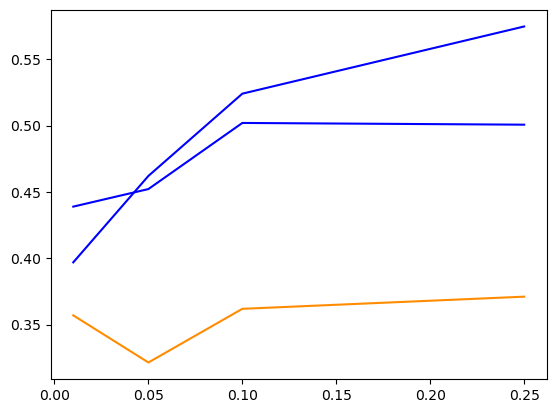

In [62]:
plt.plot([0.01, 0.05, 0.1, 0.25], ctrl1_list, c='blue')
plt.plot([0.01, 0.05, 0.1, 0.25], ctrl2_list, c='blue')
plt.plot([0.01, 0.05, 0.1, 0.25], NMD_KD_list, c='darkorange')

In [37]:
((chRNA3.loc[(chRNA3.PSI >= 0.01) & (chRNA3.PSI < 0.25)].LE_n % 3) == 0)#.mean()

exon
HsaEX0013160     True
HsaEX0018637     True
HsaEX0024762    False
HsaEX1042431    False
HsaEX1039716    False
HsaEX0030975     True
HsaEX1027294    False
HsaEX1037522     True
HsaEX0045153    False
HsaEX0055524     True
Name: LE_n, dtype: bool

In [2]:
def process_long_reads(longreads_file, df):
    gm = pd.read_csv('../code/LongReads/Junctions/' + longreads_file, sep='\t', 
                  names = ['chrom', 'start', 'end', 'junction_id', 'read', 'strand'])
    
    gm.start = gm.start.astype(int)
    gm.end = gm.end.astype(int)
    
    gm.end -= 1
    
    c1 = df.merge(gm, left_on=['chrom', 'donor_c1', 'receptor_c1'], right_on=['chrom', 'start', 'end'])
    ca = df.merge(gm, left_on=['chrom', 'donor_c1', 'receptor_c2'], right_on=['chrom', 'start', 'end'])

    shared_idx = c1.index.intersection(c2.index.intersection(ca.index))

    df_ = c1.merge(gm, left_on=['chrom', 'donor_c2', 'receptor_c2'], right_on=['chrom', 'start', 'end'])
    
    df_SE = df_.loc[df_.read_x == df_.read_y]
    
    skipped = ca.groupby('event').size().reset_index()
    skipped.columns = ['exon', 'skipped_juncs']

    included = df_SE.groupby('event').size().reset_index()
    included.columns = ['exon', 'included_juncs']
    
    exon_psi = pd.merge(skipped, included, how='outer', left_on='exon', right_on='exon').fillna(0)
    exon_psi['PSI'] = exon_psi.included_juncs/(exon_psi.included_juncs + exon_psi.skipped_juncs)
    exon_psi = exon_psi.set_index('exon')

    df__ = df.set_index('event')
    exon_psi['LE_n'] = df__.loc[exon_psi.index].LE_n

    return exon_psi

In [23]:
# def process_long_reads(longreads_file, df):
#     gm = pd.read_csv('../code/LongReads/Junctions/' + longreads_file, sep='\t', 
#                   names = ['chrom', 'start', 'end', 'junction_id', 'read', 'strand'])
    
#     gm.start = gm.start.astype(int)
#     gm.end = gm.end.astype(int)
    
#     gm.end -= 1
    
#     c1_concat = []
#     ca_concat = []
    
#     for idx, gm_ in tqdm(gm.groupby('read')):
#         c1_ = df.merge(gm_, left_on=['chrom', 'donor_c1', 'receptor_c1'], right_on=['chrom', 'start', 'end'])
#         ca_ = df.merge(gm_, left_on=['chrom', 'donor_c1', 'receptor_c2'], right_on=['chrom', 'start', 'end'])
        
#         c1_concat.append(c1_)
#         c1_concat.append(ca_)
    
# #     c1 = df.merge(gm, left_on=['chrom', 'donor_c1', 'receptor_c1'], right_on=['chrom', 'start', 'end'])
# #     ca = df.merge(gm, left_on=['chrom', 'donor_c1', 'receptor_c2'], right_on=['chrom', 'start', 'end'])
    
#     c1 = pd.concat(c1_concat)
#     ca = pd.concat(ca_concat)
    
#     return c1, ca

# #     shared_idx = c1.index.intersection(ca.index)

# #     df_ = c1.merge(gm, left_on=['chrom', 'donor_c2', 'receptor_c2'], right_on=['chrom', 'start', 'end'])
    
# #     df_SE = df_.loc[df_.read_x == df_.read_y]
    
# #     skipped = ca.groupby('event').size().reset_index()
# #     skipped.columns = ['exon', 'skipped_juncs']

# #     included = df_SE.groupby('event').size().reset_index()
# #     included.columns = ['exon', 'included_juncs']
    
# #     exon_psi = pd.merge(skipped, included, how='outer', left_on='exon', right_on='exon').fillna(0)
# #     exon_psi['PSI'] = exon_psi.included_juncs/(exon_psi.included_juncs + exon_psi.skipped_juncs)
# #     exon_psi = exon_psi.set_index('exon')

# #     df__ = df.set_index('event')
# #     exon_psi['LE_n'] = df__.loc[exon_psi.index].LE_n

# #     return exon_psi

In [3]:
def process_long_reads(longreads_file, df):
    gm = pd.read_csv('../code/LongReads/Junctions/' + longreads_file, sep='\t', 
                  names = ['chrom', 'start', 'end', 'junction_id', 'read', 'strand'])
    
    gm.start = gm.start.astype(int)
    gm.end = gm.end.astype(int)
    
    gm.end -= 1
    
    exon_psi_concat = []
    
    chroms = ['chr' + str(i) for i in range(1, 23)]
    
    for chrom in tqdm(chroms):
        df_slice = df.loc[df.chrom == chrom]
        gm_slice = gm.loc[gm.chrom == chrom]
    
        c1 = df_slice.merge(gm_slice, left_on=['chrom', 'donor_c1', 'receptor_c1'], right_on=['chrom', 'start', 'end'])
        ca = df_slice.merge(gm_slice, left_on=['chrom', 'donor_c1', 'receptor_c2'], right_on=['chrom', 'start', 'end'])

        df_ = c1.merge(gm, left_on=['chrom', 'donor_c2', 'receptor_c2'], right_on=['chrom', 'start', 'end'])
    
        df_SE = df_.loc[df_.read_x == df_.read_y]
    
        skipped = ca.groupby('event').size().reset_index()
        skipped.columns = ['exon', 'skipped_juncs']

        included = df_SE.groupby('event').size().reset_index()
        included.columns = ['exon', 'included_juncs']

        exon_psi = pd.merge(skipped, included, how='outer', left_on='exon', right_on='exon').fillna(0)
        exon_psi['PSI'] = exon_psi.included_juncs/(exon_psi.included_juncs + exon_psi.skipped_juncs)
        exon_psi = exon_psi.set_index('exon')

        df__ = df.set_index('event')
        exon_psi['LE_n'] = df__.loc[exon_psi.index].LE_n
        
        exon_psi_concat.append(exon_psi)
        
        print(exon_psi.shape)
        
    exon_psi = pd.concat(exon_psi_concat)

    return exon_psi

In [4]:
def merge_annot_longreads(df, gm, chrom, split=None):
    
    if split:
        med_start = df.receptor_c2.median()
        if split == 1:
            df_slice = df.loc[(df.chrom == chrom) & (df.receptor_c2 < med_start)]
        elif split == 2:
            df_slice = df.loc[(df.chrom == chrom) & (df.receptor_c2 >= med_start)]
            
    else:
        df_slice = df.loc[df.chrom == chrom]
        
    gm_slice = gm.loc[gm.chrom == chrom]

    c1 = df_slice.merge(gm_slice, left_on=['chrom', 'donor_c1', 'receptor_c1'], right_on=['chrom', 'start', 'end'])
    ca = df_slice.merge(gm_slice, left_on=['chrom', 'donor_c1', 'receptor_c2'], right_on=['chrom', 'start', 'end'])

    df_ = c1.merge(gm, left_on=['chrom', 'donor_c2', 'receptor_c2'], right_on=['chrom', 'start', 'end'])

    df_SE = df_.loc[df_.read_x == df_.read_y]

    skipped = ca.groupby('event').size().reset_index()
    skipped.columns = ['exon', 'skipped_juncs']

    included = df_SE.groupby('event').size().reset_index()
    included.columns = ['exon', 'included_juncs']

    exon_psi = pd.merge(skipped, included, how='outer', left_on='exon', right_on='exon').fillna(0)
    exon_psi['PSI'] = exon_psi.included_juncs/(exon_psi.included_juncs + exon_psi.skipped_juncs)
    exon_psi = exon_psi.set_index('exon')

    df__ = df.set_index('event')
    exon_psi['LE_n'] = df__.loc[exon_psi.index].LE_n
    
    return exon_psi

def process_long_reads(longreads_file, df, split=False):
    gm = pd.read_csv('../code/LongReads/Junctions/' + longreads_file, sep='\t', 
                  names = ['chrom', 'start', 'end', 'junction_id', 'read', 'strand'])
    
    gm.start = gm.start.astype(int)
    gm.end = gm.end.astype(int)
    
    gm.end -= 1
    
    exon_psi_concat = []
    
    chroms = ['chr' + str(i) for i in range(1, 23)]
    
    for chrom in tqdm(chroms):
        
        if split:
            exon_psi_1 = merge_annot_longreads(df, gm, chrom, split=1)
            exon_psi_2 = merge_annot_longreads(df, gm, chrom, split=2)
            exon_psi_concat.extend([exon_psi_1, exon_psi_2])
            
        else:
            exon_psi = merge_annot_longreads(df, gm, chrom)
        
            exon_psi_concat.append(exon_psi)
        
            
    exon_psi = pd.concat(exon_psi_concat)

    return exon_psi

In [5]:
# gm = pd.read_csv('../code/LongReads/Junctions/GM8.junc.gz', sep='\t', 
#                   names = ['chrom', 'start', 'end', 'junction_id', 'read', 'strand'])

exons = pd.read_csv('../../EVENT_INFO-hg38.tab.gz', sep='\t')[['EVENT', 'COMPLEX', 'CO_C1', 'CO_A', 'CO_C2', 'LE_n']].dropna()
exons = exons.loc[~exons.COMPLEX.isin(['MIC_S', 'IR', 'Alt3', 'Alt5', 'MIC-M'])]
exons = exons.set_index('EVENT')

impact = pd.read_csv('../../PROT_IMPACT-hg38-v3.tab.gz', sep='\t')
impact = impact.set_index('EventID')
impact = impact.loc[~impact.ONTO.isin(['NonCoding', "5' UTR", "3' UTR"])]

In [6]:

exon = exons.index
LE = exons.LE_n
c1 = exons.CO_C1.str.split('-', expand=True)
chrom = c1[0].str.split(':', expand=True)[0]
donor_c1 = c1[1].astype(int)

ca = exons.CO_A.str.split('-', expand=True)
receptor_c1 = ca[0].str.split(':', expand=True)[1].astype(int) - 1
donor_c2 = ca[1].astype(int)

c2 = exons.CO_C2.str.split('-', expand=True)
receptor_c2 = c2[0].str.split(':', expand=True)[1].astype(int) - 1

exon = exons.index
LE = exons.LE_n
c1 = exons.CO_C1.str.split('-', expand=True)
chrom = c1[0].str.split(':', expand=True)[0]
donor_c1 = c1[1].astype(int)

ca = exons.CO_A.str.split('-', expand=True)
receptor_c1 = ca[0].str.split(':', expand=True)[1].astype(int) - 1
donor_c2 = ca[1].astype(int)

c2 = exons.CO_C2.str.split('-', expand=True)
receptor_c2 = c2[0].str.split(':', expand=True)[1].astype(int) - 1



In [7]:
df = pd.DataFrame()
df['event'] = list(exon)
df['chrom'] = list(chrom)
df['donor_c1'] = list(donor_c1)
df['receptor_c1'] = list(receptor_c1)
df['donor_c2'] = list(donor_c2)
df['receptor_c2'] = list(receptor_c2)
df['LE_n'] = list(LE)
df = df.loc[[x[:5]=='HsaEX' for x in df.event]]
df = df.loc[df.event.isin(impact.loc[~impact.ONTO.isin(['NonCoding', "5' UTR", "3' UTR"])].index)]

# df = df.set_index('event')

In [36]:
gm1 = process_long_reads('GM1.junc.gz', df)
gm2 = process_long_reads('GM2.junc.gz', df)
gm3 = process_long_reads('GM3.junc.gz', df)
gm4 = process_long_reads('GM4.junc.gz', df)
gm5 = process_long_reads('GM5.junc.gz', df)
gm6 = process_long_reads('GM6.junc.gz', df)
gm7 = process_long_reads('GM7.junc.gz', df)
gm8 = process_long_reads('GM8.junc.gz', df)
gm9 = process_long_reads('GM9.junc.gz', df)
gm10 = process_long_reads('GM10.junc.gz', df)

In [27]:
gm = pd.read_csv('../code/LongReads/Junctions/CTRL1_shRNA.SAMEA8691110.junc.gz' , sep='\t', 
                  names = ['chrom', 'start', 'end', 'junction_id', 'read', 'strand'])
    
gm.start = gm.start.astype(int)
gm.end = gm.end.astype(int)

gm.end -= 1

In [29]:
df

,event,chrom,donor_c1,receptor_c1,donor_c2,receptor_c2,LE_n
7,HsaEX0000182,chr4,56371643,56355181,56355423,56354704,242
8,HsaEX0000217,chr9,104861800,104858521,104858698,104855565,177
9,HsaEX0000219,chr9,104858698,104845476,104845569,104840278,93
10,HsaEX0000226,chr9,104814475,104814117,104814231,104812573,114
11,HsaEX0000238,chr17,69174394,69164963,69165083,69164073,120
...,...,...,...,...,...,...,...
223160,HsaEX1024814,chr17,36513505,36512873,36512883,36511364,10
223161,HsaEX1024252,chr17,38320767,38321961,38321967,38322125,6
223162,HsaEX0050343,chr10,13587149,13614071,13614086,13616397,15
223163,HsaEX1033769,chr11,43556961,43576597,43576611,43584559,14


In [28]:
gm

,chrom,start,end,junction_id,read,strand
0,chr1,14829,14969,LongRead.1:1,LongRead.1,+
1,chr1,15038,15795,LongRead.1:2,LongRead.1,+
2,chr1,15947,16606,LongRead.1:3,LongRead.1,+
3,chr1,16765,16857,LongRead.1:4,LongRead.1,+
4,chr1,17055,17605,LongRead.1:5,LongRead.1,+
...,...,...,...,...,...,...
7389071,chr22,50785293,50788749,LongRead.1487599:1,LongRead.1487599,+
7389072,chr22,50785293,50798654,LongRead.1487600:1,LongRead.1487600,-
7389073,chr22,50800362,50800926,LongRead.1487601:1,LongRead.1487601,+
7389074,chr22,50800079,50800538,LongRead.1487602:1,LongRead.1487602,-


In [20]:
df.merge(gm_, left_on=['chrom', 'donor_c1', 'receptor_c1'], right_on=['chrom', 'start', 'end'])

,event,chrom,donor_c1,receptor_c1,donor_c2,receptor_c2,LE_n,start,end,junction_id,read,strand


In [8]:
ctrl1 = process_long_reads('CTRL1_shRNA.SAMEA8691110.junc.gz', df)
# ctrl2 = process_long_reads('CTRL2_shRNA.SAMEA8691111.junc.gz', df, split=True)

# NMD_KD = process_long_reads('SMG6_SMG7_shRNA.SAMEA8691113.junc.gz', df)

# chRNA3 = process_long_reads('K562_4sUchr_ONT_3.SAMN10505967.junc.gz', df)
# chRNA4 = process_long_reads('K562_4sUchr_ONT_4.SAMN12726878.junc.gz', df)
# chRNA5a = process_long_reads('K562_4sUchr_ONT_5a.SAMN12726877.junc.gz', df)
# chRNA5b = process_long_reads('K562_4sUchr_ONT_5b.SAMN12726876.junc.gz', df)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [03:46<00:00, 10.31s/it]


In [9]:
ctrl1.shape

(48479, 4)

In [14]:
((ctrl1.loc[(ctrl1.PSI >= 0.01) & (ctrl1.PSI < 0.05)].LE_n % 3) == 0).mean()

0.3968871595330739

In [15]:
((ctrl1.loc[(ctrl1.PSI >= 0.05) & (ctrl1.PSI < 0.1)].LE_n % 3) == 0).mean()

0.4620253164556962

In [16]:
((ctrl1.loc[(ctrl1.PSI >= 0.1) & (ctrl1.PSI < 0.25)].LE_n % 3) == 0).mean()

0.5240174672489083

In [17]:
((ctrl1.loc[(ctrl1.PSI >= 0.25) & (ctrl1.PSI < 0.75)].LE_n % 3) == 0).mean()

0.5746478873239437

In [40]:
def get_symmetric(exon_psi):
    gm1_ = []
    gm1_.append(((gm1.loc[(exon_psi.PSI >= 0.01) & (gm1.PSI < 0.05)].LE_n % 3) == 0).mean())
    gm1_.append(((gm1.loc[(exon_psi.PSI >= 0.05) & (gm1.PSI < 0.1)].LE_n % 3) == 0).mean())
    gm1_.append(((gm1.loc[(exon_psi.PSI >= 0.1) & (gm1.PSI < 0.25)].LE_n % 3) == 0).mean())
    gm1_.append(((gm1.loc[(exon_psi.PSI >= 0.25) & (gm1.PSI < 0.75)].LE_n % 3) == 0).mean())
    
    return gm1_



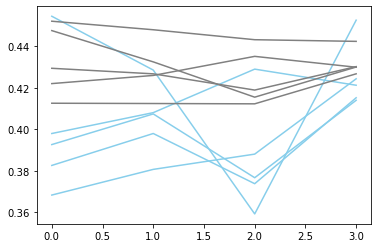

In [43]:
plt.plot(get_symmetric(gm1), c='skyblue')
plt.plot(get_symmetric(gm3), c='skyblue')
plt.plot(get_symmetric(gm5), c='skyblue')
plt.plot(get_symmetric(gm7), c='skyblue')
plt.plot(get_symmetric(gm9), c='skyblue')

plt.plot(get_symmetric(gm2), c='grey')
plt.plot(get_symmetric(gm4), c='grey')
plt.plot(get_symmetric(gm6), c='grey')
plt.plot(get_symmetric(gm8), c='grey')
plt.plot(get_symmetric(gm10), c='grey')

In [20]:
gm_m1 = gm.copy()
gm_m1.end -= 1

In [21]:
c1 = df.merge(gm_m1, left_on=['chrom', 'donor_c1', 'receptor_c1'], right_on=['chrom', 'start', 'end'])
c2 = df.merge(gm_m1, left_on=['chrom', 'donor_c2', 'receptor_c2'], right_on=['chrom', 'start', 'end'])
ca = df.merge(gm_m1, left_on=['chrom', 'donor_c1', 'receptor_c2'], right_on=['chrom', 'start', 'end'])

# c1 = c1.set_index('event').dropna()
# c2 = c2.set_index('event').dropna()
# ca = ca.set_index('event').dropna()

# samples = chRNA_psi.columns[6:]

shared_idx = c1.index.intersection(c2.index.intersection(ca.index))
# shared_idx = shared_idx[(c1.loc[shared_idx, samples] - c2.loc[shared_idx, samples]).abs().mean(axis=1) <= 0.333]

# psi_c1 = c1.loc[shared_idx, samples]
# psi_c2 = c2.loc[shared_idx, samples]
# psi_ca = ca.loc[shared_idx, samples]

# psi_chRNA = (psi_c1 + psi_c2)/(psi_c1 + psi_c2 + (2*psi_ca))


In [22]:
df_ = c1.merge(gm_m1, left_on=['chrom', 'donor_c2', 'receptor_c2'], right_on=['chrom', 'start', 'end'])

In [23]:
df_SE = df_.loc[df_.read_x == df_.read_y]

In [24]:
c1

,event,chrom,donor_c1,receptor_c1,donor_c2,receptor_c2,LE_n,start,end,junction_id,read,strand
0,HsaEX0000803,chr19,2344424,2344552,2344652,2345252,100,2344424,2344552,LongRead.73379:11,LongRead.73379,+
1,HsaEX0000803,chr19,2344424,2344552,2344652,2345252,100,2344424,2344552,LongRead.73380:5,LongRead.73380,+
2,HsaEX0000803,chr19,2344424,2344552,2344652,2345252,100,2344424,2344552,LongRead.73382:10,LongRead.73382,+
3,HsaEX0000805,chr19,2345330,2351433,2351594,2352945,161,2345330,2351433,LongRead.73379:13,LongRead.73379,+
4,HsaEX0000805,chr19,2345330,2351433,2351594,2352945,161,2345330,2351433,LongRead.73380:7,LongRead.73380,+
...,...,...,...,...,...,...,...,...,...,...,...,...
293471,HsaEX0065810,chr3,44862116,44862357,44862360,44864196,3,44862116,44862357,LongRead.103326:1,LongRead.103326,+
293472,HsaEX1040805,chr10,49942300,49945031,49945037,49952125,6,49942300,49945031,LongRead.15787:1,LongRead.15787,+
293473,HsaEX1040805,chr10,49942300,49945031,49945037,49952125,6,49942300,49945031,LongRead.15789:1,LongRead.15789,+
293474,HsaEX1040805,chr10,49942300,49945031,49945037,49952125,6,49942300,49945031,LongRead.15790:1,LongRead.15790,+


In [25]:
skipped = ca.groupby('event').size().reset_index()
skipped.columns = ['exon', 'skipped_juncs']
# skipped.index = skipped.exon

included = df_SE.groupby('event').size().reset_index()
included.columns = ['exon', 'included_juncs']
# included.index = included.exon

In [26]:
exon_psi = pd.merge(skipped, included, how='outer', left_on='exon', right_on='exon').fillna(0)
exon_psi['PSI'] = exon_psi.included_juncs/(exon_psi.included_juncs + exon_psi.skipped_juncs)
exon_psi = exon_psi.set_index('exon')
# df__ = df.copy()
df__ = df.set_index('event')
exon_psi['LE_n'] = df__.loc[exon_psi.index].LE_n

In [27]:
# ((exon_psi.loc[(exon_psi.PSI >= 0.001) & (exon_psi.PSI < 0.01)].LE_n % 3) == 0).mean()

In [31]:
((exon_psi.loc[(exon_psi.PSI >= 0.01) & (exon_psi.PSI < 0.05)].LE_n % 3) == 0).mean()

0.3902439024390244

In [32]:
((exon_psi.loc[(exon_psi.PSI >= 0.05) & (exon_psi.PSI < 0.1)].LE_n % 3) == 0).mean()

0.44642857142857145

In [33]:
((exon_psi.loc[(exon_psi.PSI >= 0.1) & (exon_psi.PSI < 0.25)].LE_n % 3) == 0).mean()

0.5309734513274337

In [34]:
((exon_psi.loc[(exon_psi.PSI >= 0.25) & (exon_psi.PSI < 0.75)].LE_n % 3) == 0).mean()

0.4940898345153664

In [19]:
df.merge(gm_m1, left_on=['chrom', 'donor_c2', 'receptor_c2'], right_on=['chrom', 'start', 'end']).shape

(197065, 12)

In [22]:
df.merge(gm_m1, left_on=['chrom', 'donor_c1', 'receptor_c2'], right_on=['chrom', 'start', 'end']).shape

(39572, 12)